<h3 align='left'>M1 biostatistic</h3> 
<h3 align='right'>May, 2020</h3>

*********************

# <center>Project chaoseverywhere</center>

Authors : 

# Table of Contents 

1. [The logistic function]
    1. [The definition]
    1. [An application : The bifurcation]
    

# 1. The logistic function
## 1. The definition

To create the logistic function, we need some packages.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets
import sys
from os.path import normpath, join

In [2]:
sys.path.append(os.path.dirname(os.path.abspath('chaoseverywhere')) + (os.path.sep + '..')*2)
import chaoseverywhere

The logistic function is a second order's recursive sequence : $x_{n+1}=rx_n(1-x_n)$, $r\in[0,4]$.
We can also write this function without sequences : $f(x)=rx(1-x)$.

An example with `r = 1.9`, `x0 = 0.01` and `iterations = 100`.        

In [3]:
fx=chaoseverywhere.logistic(r=1.9, x=0.01)
print("f(0.01)=",fx) 

f(0.01)= 0.01881


We have the function that calculate the image of the logistic function. Now, we draw the (y=x) straight line and trace the logistic sequence.

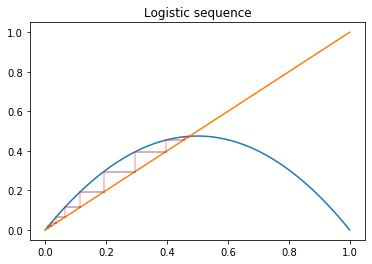

In [4]:
chaoseverywhere.logistic_draw(0.01, 1.9, 100, 100)

An other exemple with `r= 3.6`.

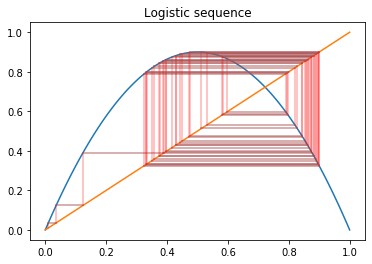

In [8]:
chaoseverywhere.logistic_draw(0.01, 3.6, 50, 100)

We observe that the chaotic diagram happens when the coefficient `r` is superior or equal to 3.57

To prove that it's really this coefficient, we add a widget. With this widget, we can change the value of `r` and see the corresponding graph. 

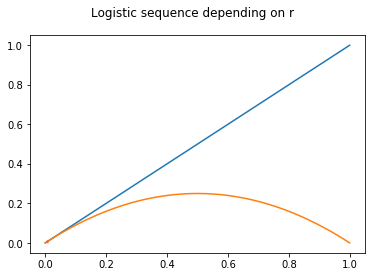

<function chaoseverywhere.logi.code_python.plot_logi_interact(x0, mu, nb_iter=100, linsdim=100)>

In [6]:
interact(chaoseverywhere.plot_logi_interact, x0=fixed(0.01), mu=widgets.FloatSlider(min=1, max=4, step=0.001, continuous_update=False),
         nb_iter=widgets.IntSlider(min=10, max=150, step=10, value=60),
         linsdim=fixed(100))

Here, we can see all the evolution of the logistic sequence.

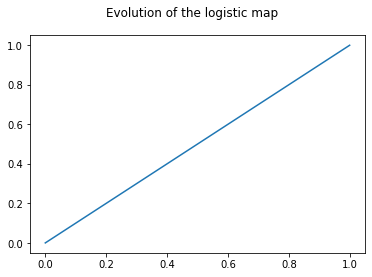

In [8]:
chaoseverywhere.animate_logistic(save=False)

## 2. An application : The bifurcation

The bifurcation uses the logistic function. </br>
Actually, the bifurcation is a repetition of logistic sequence points. We begin the sequence with a random number. Then, we apply the logistic sequence (here, we will chose 500 times) to find another points. We repeat this loop five times. <br/>
This is the getting graph.

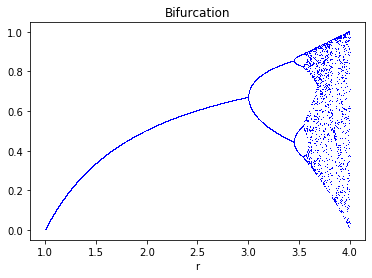

In [7]:
chaoseverywhere.bifurcation(show=True)

The first bifurcation happens at `r=3`, the secund at roughly `r=3.45`, etc...